In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import matplotlib.pyplot as plt

import numpy as np
from RetaredHarmonicDynamics import animate_particle


tensor = torch.tensor

In [3]:
with_animations = False

In [4]:
x_hist = {}

# Brownian particle in harmonic potential

In [5]:
num_particle = 50000
N = 500
dt = 1
m = 10
k = 0.005
dims = (N,num_particle,2)

pos = torch.empty(dims)
vel = torch.empty(dims)
force = torch.normal(0,1,dims)

ran_dv = force / m * dt

# Set inital values
vel[0] = tensor([[0,0]])
pos[0] = tensor([[0,0]])

In [6]:
for i in range(1,N):
    pos[i] = pos[i-1] + vel[i-1] * dt
    vel[i] = ran_dv[i] - k * pos[i] * dt    # overdamed old vel unimportaned

In [7]:
# beträge
b_v = (vel**2).sum(axis=2).sqrt()
abs_x = (pos**2).sum(axis=2).sqrt()

## Movement in 2-d plane

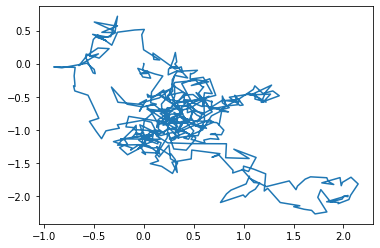

In [8]:
plt.plot(pos[:,0,0], pos[:,0,1])

In [9]:
# animate_particle(x_data = lambda i: pos[:i + 1,0,0],
#                  y_data = lambda i: pos[:i + 1,0,1],
#                  x_patch = lambda i: pos[i,0,0],
#                  y_patch = lambda i: pos[i,0,1],
#                  f=5, N=N)

## Absolute distance from 0,0

In [10]:
# plt.hist(abs_x[:,1], bins=50)
# pass

In [11]:
# plt.hist(abs_x[1], bins=50, range=(0,1.4))
# pass

In [12]:
if with_animations:
    animate_particle(x_data = lambda i: np.linspace(0,3,50),
                     y_data = lambda i: abs_x[i].histc(bins=50, min=0, max=3)/num_particle,
                     xlim=(0,3), ylim=(0.,0.15),
                      f=1, N=N)

## x-Position

In [13]:
if with_animations:
    animate_particle(x_data = lambda i: np.linspace(-3,3,50),
                     y_data = lambda i: pos[i,:,0].histc(bins=50, min=-3, max=3)/num_particle,
                     xlim=(-3,3), ylim=(0.,0.15),
                      f=1, N=N)

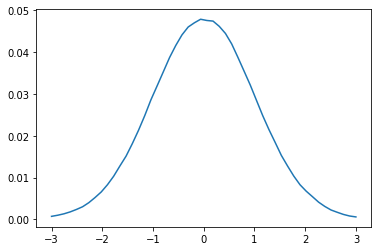

In [14]:

plt.plot(np.linspace(-3,3,50),x_hist[0] )

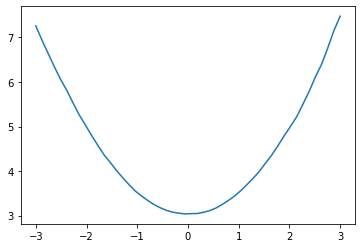

In [15]:
prob_dens = pos[-50:,:,0].histc(bins=50, min=-3, max=3)/num_particle/50
pot = -prob_dens.log()
x = np.linspace(-3,3,50)
plt.plot(x, pot)

## Retarded Potential

In [16]:
num_particle = 50000
N = 1000
dt = 1
m = 10
k = 0.005
dims = (N,num_particle,2)
tau = 300

pos = torch.empty(dims)
vel = torch.empty(dims)
force = torch.normal(0,1,dims)

ran_dv = force / m * dt

# Set inital values
vel[:tau+1] = torch.zeros((tau+1,num_particle,2))
pos[:tau+1] = torch.zeros((tau+1,num_particle,2))

KeyboardInterrupt: 

In [ ]:
for i in range(tau+1,N):
    pos[i] = pos[i-1] + vel[i-1] * dt
    vel[i] = ran_dv[i] - k * pos[i-tau] * dt    # overdamed old vel unimportaned

In [ ]:
# beträge
b_v = (vel**2).sum(axis=2).sqrt()
abs_x = (pos**2).sum(axis=2).sqrt()

### Movement in 2-d plane

In [ ]:
plt.plot(pos[:,0,0], pos[:,0,1])

In [ ]:
if with_animations or False:
    anim = animate_particle(x_data = lambda i: pos[:i + 1,0,0],
                 y_data = lambda i: pos[:i + 1,0,1],
                 x_patch = lambda i: pos[i,0,0],
                 y_patch = lambda i: pos[i,0,1],
                 f=1, N=N)

### Absolute distance from 0,0

In [ ]:
# plt.hist(abs_x[-1], bins=50, range=(0,3))
# pass

In [ ]:
if with_animations:
    animate_particle(x_data = lambda i: np.linspace(0,3,50),
                     y_data = lambda i: abs_x[i].histc(bins=50, min=0, max=3)/num_particle,
                     xlim=(0,3), ylim=(0.,0.15),
                      f=1, N=N)

### x-Position

In [ ]:
x_hist[tau] = pos[-50:,:,0].histc(bins=50, min=-3, max=3)/num_particle/50
plt.plot(np.linspace(-3,3,50), x_hist[tau])

## Comparision

In [ ]:
for tau in x_hist:
    plt.plot(np.linspace(-3,3,50), x_hist[tau])

# Two particle

In [5]:
r_hist = {}

In [97]:
def get_r_pos(
    num_particle = 5000,
    N = 1000,
    dt = 1,
    m = 10,
    k = 0.005,
    tau = 0,
    d = 1):
    
    dims = (N,num_particle,2)

    pos = torch.empty(dims)
    vel = torch.empty(dims)
    force = torch.normal(0,1,dims)

    ran_dv = force / m * dt

    # Set inital values
    vel[:tau+1] = torch.zeros((tau+1,num_particle,2))
    pos[:tau+1,:,0] = torch.full((tau+1,num_particle),-d/2)
    pos[:tau+1,:,1] = torch.full((tau+1,num_particle),d/2)

    for i in range(tau+1,N):
        pos[i] = pos[i-1] + vel[i-1] * dt
        interaction = k * ((pos[i-tau].diff(axis=1)[:,0]).abs() - d) * pos[i-tau].diff(axis=1)[:,0].sign()
        vel[i,:,0] = ran_dv[i,:,0] + interaction * dt    # overdamed old vel unimportaned
        vel[i,:,1] = ran_dv[i,:,1] - interaction * dt

    # Transform ir relative co.
    r_pos = pos - pos.mean(axis=2, keepdim=True)
    return r_pos

In [92]:
r_pos = get_r_pos()

### Movement in 2-d plane

In [24]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

rc('animation', html='jshtml')

f = 50
fig = plt.figure(figsize=(5, 5))
fig.set_dpi(100)
ax = plt.axes(xlim=(-5,5), ylim=(-5,5))
patch1 = plt.Circle((1, 0), 0.1, fc='y')
patch2 = plt.Circle((-1, 0), 0.1, fc='r')

# initialization function 
def init():
    # creating an empty plot/frame 
    patch1.center = (1, 0)
    patch2.center = (-1, 0)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    return patch1, patch2

    # animation function 

def animate(i):
    frame = i * f
    patch1.center = (r_pos[frame,0,0], 0)
    patch2.center = (r_pos[frame,0,1], 0)
    return patch1, patch2

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N // f, interval=20, blit=True)
plt.close()

In [25]:
if with_animations or False:
    display(anim)

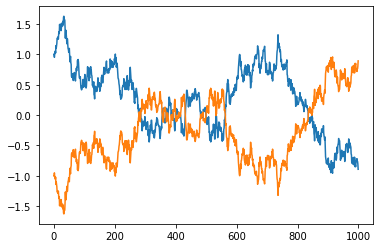

In [26]:
plt.plot(r_pos[:,0,1])
plt.plot(r_pos[:,0,0])

In [15]:
r_pos.diff(axis=2).abs().mean()

tensor(1.3359)

### r-Position

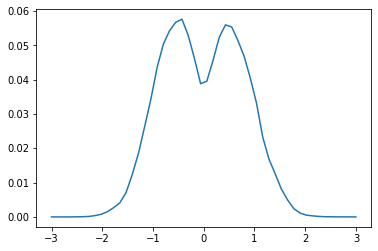

In [16]:
r_hist[0] = r_pos[-50:,:,0].histc(bins=50, min=-3, max=3)/num_particle/50
plt.plot(np.linspace(-3,3,50),r_hist[0] )

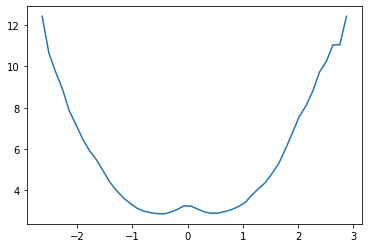

In [17]:
pot = -r_hist[0].log()
x = np.linspace(-3,3,50)
plt.plot(x, pot)

In [19]:
if with_animations or False:
    animate_particle(x_data = lambda i: np.linspace(-3,3,50),
                    y_data = lambda i: r_pos[i,:,0].histc(bins=50, min=-3, max=3)/num_particle,
                    xlim=(-3,3), ylim=(0.,0.15),
                    f=2, N=N)

### little paramter scan

In [110]:
r_hist = torch.empty((4,50))
k_vals = [0.005+0.025*i for i in range(4)]
for i in range(4):
    r_pos = get_r_pos(k = k_vals[i])
    r_hist[i] = r_pos[-50:,:,0].histc(bins=50, min=-3, max=3)/num_particle/50

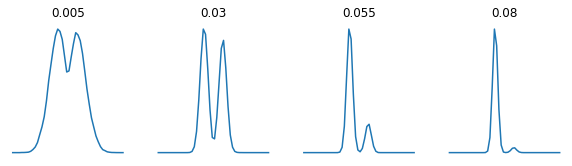

In [111]:
plt.figure(figsize=(10,2.5))

ax = [None] * 4
for i in range(0,4):
    
    
    ax[i] = plt.subplot(1,4,i+1)
    ax[i].plot(np.linspace(-3,3,50),r_hist[i] )
    ax[i].title.set_text(round(k_vals[i],4))
    ax[i].axis("off")

plt.show()

In [112]:
r_hist = torch.empty((16,50))
k_vals = [0.005+0.025*i for i in range(4)]
tau_val = [5*i for i in range(4)]
for i in range(16):
    r_pos = get_r_pos(k = k_vals[i%4], tau=tau_val[i//4])
    r_hist[i] = r_pos[-50:,:,0].histc(bins=50, min=-3, max=3)/num_particle/50

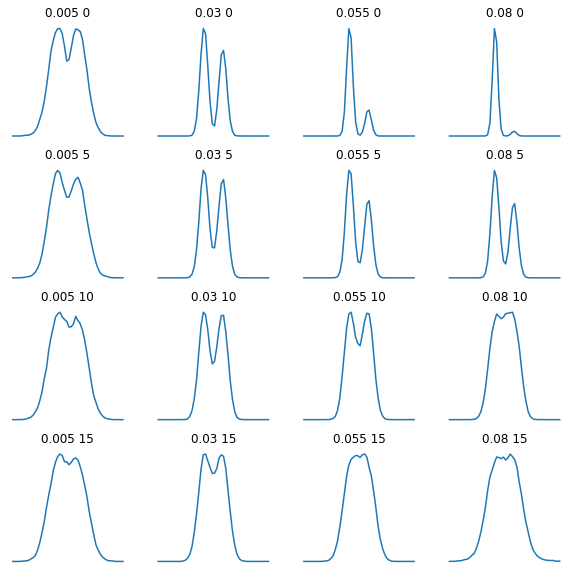

In [115]:
plt.figure(figsize=(10,10))

ax = [None] * 16
for i in range(0,16):
    
    
    ax[i] = plt.subplot(4,4,i+1)
    ax[i].plot(np.linspace(-3,3,50),r_hist[i] )
    ax[i].title.set_text(str(round(k_vals[i%4],4))+' '+str(round(tau_val[i//4],4)))
    ax[i].axis("off")

plt.show()